<a href="https://colab.research.google.com/github/NEBTICS/Fruits-Classsification-/blob/master/Fruits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NEBTICS/Fruits-Classsification-

Cloning into 'Fruits-Classsification-'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [2]:
cd Fruits-Classsification-/

/content/Fruits-Classsification-


In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smithbarbose","key":"efd499fa06f6c2554fefc5408c46cac1"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d moltean/fruits

 97% 737M/760M [00:17<00:00, 25.6MB/s]
100% 760M/760M [00:17<00:00, 46.4MB/s]


In [ ]:
!unzip /content/Fruits-Classsification-/fruits.zip

Importing library

In [9]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [10]:
#Importing the data set 
#First we need to create the Image Augmantation
traning_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
#creating the test & train sets
traning_set=traning_datagen.flow_from_directory('/content/Fruits-Classsification-/fruits-360/Training',batch_size=60,target_size=(100,100),class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/Fruits-Classsification-/fruits-360/Test',batch_size=60,target_size=(100,100),class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [19]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),input_shape=[100,100,3],activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#third
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#f
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

#flatten
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=131,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 128)        

In [ ]:
checkpoint_filepath = '/content/Fruits-Classsification-/check_save'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)



In [20]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=traning_set,validation_data=test_set,epochs=5)


Epoch 1/5
1129/1129 [==============================] - 239s 212ms/step - loss: 2.0239 - accuracy: 0.4171 - val_loss: 0.6609 - val_accuracy: 0.8141
Epoch 2/5
1129/1129 [==============================] - 235s 208ms/step - loss: 0.5670 - accuracy: 0.8077 - val_loss: 0.4370 - val_accuracy: 0.8746
Epoch 3/5
1129/1129 [==============================] - 238s 211ms/step - loss: 0.3648 - accuracy: 0.8782 - val_loss: 0.2963 - val_accuracy: 0.9209
Epoch 4/5
1129/1129 [==============================] - 236s 209ms/step - loss: 0.2730 - accuracy: 0.9087 - val_loss: 0.2997 - val_accuracy: 0.9231
Epoch 5/5
1129/1129 [==============================] - 237s 210ms/step - loss: 0.2314 - accuracy: 0.9242 - val_loss: 0.3030 - val_accuracy: 0.9202


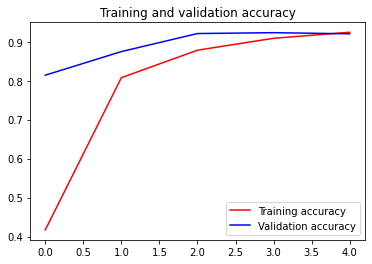

<Figure size 432x288 with 0 Axes>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [23]:

test_batches = ImageDataGenerator().flow_from_directory('/content/Fruits-Classsification-/fruits-360/Training')

test_labels = []

for i in range(0,3):
    test_labels.extend(np.array(test_batches[i][1]))
import numpy as np
#print(np.argmax(test_labels))    
print(len(test_labels))
x=test_batches.class_indices.keys()

Found 67692 images belonging to 131 classes.
96


In [24]:
x=test_batches.class_indices.keys()
y=[]
for i in range(130):
  y.extend(x)
  
import numpy as np
z=np.array(y)
print(z)
np.save('Fruits Labels',z)

d=np.load('/content/Fruits-Classsification-/Fruits Labels.npy')
print(d)

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' ...
 'Tomato not Ripened' 'Walnut' 'Watermelon']
['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' ...
 'Tomato not Ripened' 'Walnut' 'Watermelon']


In [35]:
from keras.preprocessing import image
test_image = image.load_img('/content/banana.jpg',target_size=(100,100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=np.argmax(result)
d=np.load('/content/Fruits-Classsification-/Fruits Labels.npy')
print(x)
print(d[x])

111
Quince


In [36]:
model.save('/content/drive/My Drive/Machine Learning/First_Task.h5')